<IPython.core.display.Javascript object>


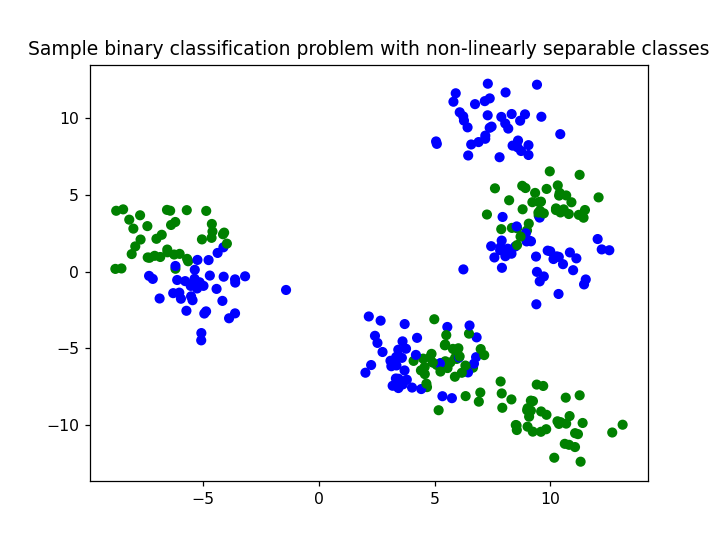

In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook
from matplotlib.colors import ListedColormap
cmap_bold = ListedColormap(['blue','#FFFF00','black','green'])

np.random.seed= 2021
X_D2, y_D2 = make_blobs(n_samples = 300, n_features = 2, centers = 8,
                       cluster_std = 1.3, random_state = 4)
y_D2 = y_D2 % 2
plt.figure()
plt.title('Sample binary classification problem with non-linearly separable classes')
plt.scatter(X_D2[:,0], X_D2[:,1], c=y_D2,
           marker= 'o', s=30, cmap=cmap_bold)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state=0)

print ('X_train.shape=', X_train.shape)
print ('y_train.shape=', y_train.shape)
print ('X_test.shape=', X_test.shape)
print ('y_test.shape=', y_test.shape)
X_train[:5]

X_train.shape= (225, 2)
y_train.shape= (225,)
X_test.shape= (75, 2)
y_test.shape= (75,)


array([[ 8.91236707, 10.26486851],
       [ 3.76575573, -5.0177148 ],
       [ 8.4940032 ,  1.64983168],
       [-6.80118674,  2.41153319],
       [ 8.56819424,  1.74050074]])

In [7]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

k_values = range(1, 31)
scores = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    score = knn.score(X_test_scaled, y_test)
    scores.append(score)

best_k = k_values[scores.index(max(scores))]
print(f"Найкраще значення 'k': {best_k}")

Найкраще значення 'k': 6


<IPython.core.display.Javascript object>


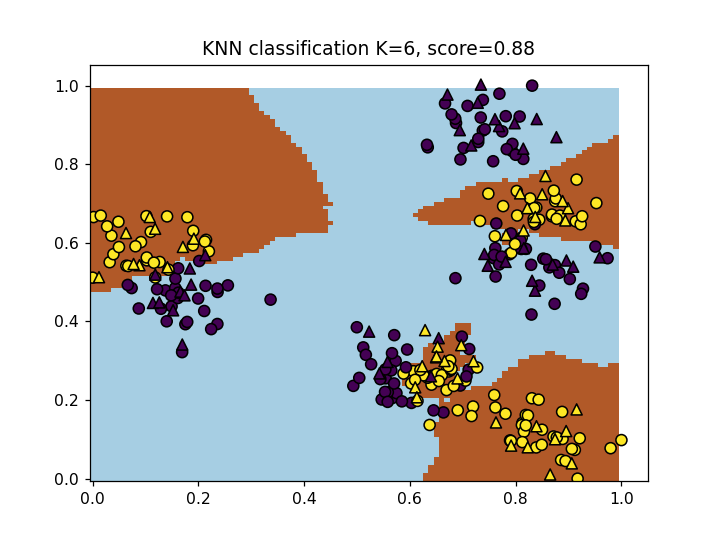

In [9]:

from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=best_k)

clf.fit(X_train_scaled, y_train)

score = clf.score(X_test_scaled, y_test)

def plot_decision_boundary(clf, X_train, y_train, X_test=None, y_test=None, title=None, precision=0.01, plot_symbol_size = 50):
    x_min, x_max = 0, 1
    y_min, y_max = 0, 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, precision),
                         np.arange(y_min, y_max, precision))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train,
                edgecolor='k', s=plot_symbol_size)

    if X_test is not None and y_test is not None:
        plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test,
                    marker='^', edgecolor='k', s=plot_symbol_size)

    if title is not None:
        plt.title(title)

    plt.show()

plot_decision_boundary(clf, X_train_scaled, y_train,
                       X_test=X_test_scaled,
                       y_test=y_test,
                       title='KNN classification K={}, score={:.2f}'.format(best_k,score),
                       precision=0.01,
                       plot_symbol_size=50)